In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
# Load the dataset
file_path = 'C:\\Kodilla\\fatal-police-shootings-data.csv'
df = pd.read_csv(file_path)


In [172]:
# Display the first few rows of the dataframe
print(df.head())


   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing      

In [173]:
# Group the data by 'race' and 'signs_of_mental_illness' and count the occurrences
summary_table = df.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='count')
print(summary_table)


   race  signs_of_mental_illness  count
0     A                    False     69
1     A                     True     24
2     B                    False   1114
3     B                     True    184
4     H                    False    745
5     H                     True    157
6     N                    False     64
7     N                     True     14
8     O                    False     37
9     O                     True     11
10    W                    False   1763
11    W                     True    713


In [174]:
# Calculate the percentage of victims showing signs of mental illness for each race
race_groups = df.groupby('race')['signs_of_mental_illness'].mean() * 100
race_groups

race
A    25.806452
B    14.175655
H    17.405765
N    17.948718
O    22.916667
W    28.796446
Name: signs_of_mental_illness, dtype: float64

In [175]:
# Create a dictionary mapping each race to its percentage of mental illness signs
race_percentage_dict = race_groups.to_dict()
# Map the percentage to the dataframe
df['mental_illness_percentage'] = df['race'].map(race_percentage_dict).round(2)

# Display the updated dataframe with the new column
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,mental_illness_percentage
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,25.81
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,28.80
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,17.41
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,28.80
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,17.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,28.80
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,NaN
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,28.80
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,NaN


In [176]:
highest_percentage_race = race_groups.idxmax()
highest_percentage_value = race_groups.max()

print(f"The race with the highest percentage of victims showing signs of mental illness is {highest_percentage_race} with {highest_percentage_value:.2f}%.")

The race with the highest percentage of victims showing signs of mental illness is W with 28.80%.


In [177]:
# Add a column indicating the day of the week when the incident occurred
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,mental_illness_percentage,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,25.81,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,28.80,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,17.41,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,28.80,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,17.41,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,28.80,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,NaN,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,28.80,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,NaN,Tuesday


In [178]:
# Count incidents by day of the week
interventions_by_day = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
interventions_by_day

day_of_week
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

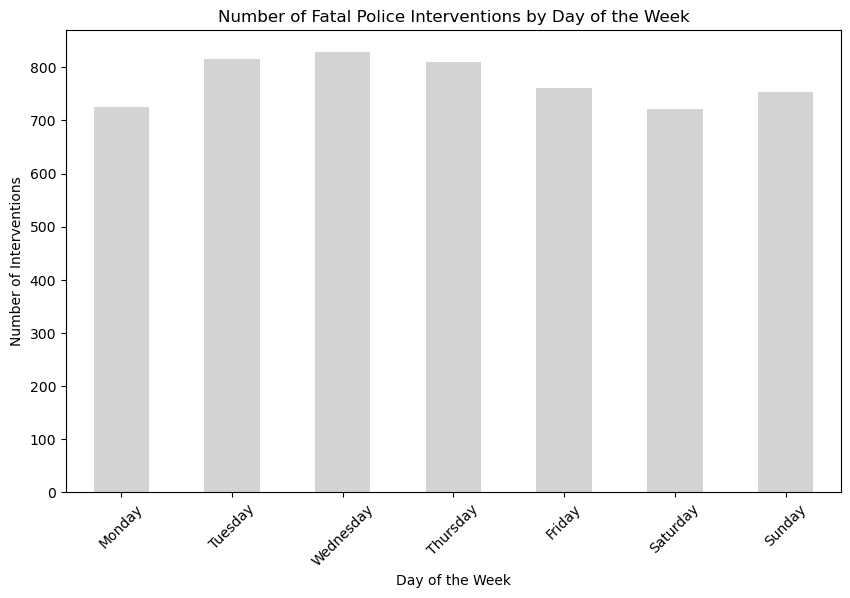

In [179]:
# Create a bar chart
plt.figure(figsize=(10, 6))
interventions_by_day.plot(kind='bar', color='lightgrey')
plt.title('Number of Fatal Police Interventions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=45)
plt.show()

In [180]:
print(race_mental_illness)
print(f'Race with the highest percentage of mental illness signs during interventions: {highest_mental_illness_race}')

signs_of_mental_illness  False  True  mental_illness_percentage
race                                                           
A                           69    24                  25.806452
B                         1114   184                  14.175655
H                          745   157                  17.405765
N                           64    14                  17.948718
O                           37    11                  22.916667
W                         1763   713                  28.796446
Race with the highest percentage of mental illness signs during interventions: W


In [181]:
# Load the population and state abbreviations data from the uploaded Excel files
population_file_path = r'C:\Kodilla\List_of_U.S._states_by_population.xlsx'
abbreviations_file_path = r'C:\Kodilla\List_of_U.S._state_and_territory_abbreviations.xlsx'
population_df = pd.read_excel(population_file_path)
abbreviations_df = pd.read_excel(abbreviations_file_path)

In [182]:
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2020-12-31')]
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,mental_illness_percentage,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,25.81,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,28.80,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,17.41,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,28.80,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,17.41,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,28.80,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,NaN,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,28.80,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,NaN,Tuesday


In [183]:
# Rename columns for clarity and consistency
population_df = population_df.rename(columns={'State': 'state', 'Census population, April 1, 2020': 'Population_2020', 'Census population, April 1, 2010': 'Population_2010'})
abbreviations_df = abbreviations_df.rename(columns={'Name': 'state', 'Abb': 'abbreviation'})


In [184]:
# Clean state names and populations in the population DataFrame
population_df['state'] = population_df['state'].str.strip()

In [185]:
# Remove non-numeric characters from population columns and handle NaN values
population_df['Population_2020'] = population_df['Population_2020'].str.replace(r'\D', '', regex=True).fillna(0).astype(int)
population_df['Population_2010'] = population_df['Population_2010'].str.replace(r'\D', '', regex=True).fillna(0).astype(int)

In [186]:
# Clean state names and abbreviations in the abbreviations DataFrame
abbreviations_df['state'] = abbreviations_df['state'].str.strip()
abbreviations_df['abbreviation'] = abbreviations_df['abbreviation'].str.strip()

In [187]:
# Merge the population and abbreviations DataFrames on the 'state' column
state_data_df = pd.merge(population_df, abbreviations_df, on='state')
state_data_df


,"Rank in states & territories, 2020","Rank in states & territories, 2010",state,Population_2020,Population_2010,"Percent change, 2010–2020","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote,Census population per House seat,"Percent of the total U.S. population, 2020",abbreviation,Cities,Unnamed: 3,Ratification or,Population,Total area[11],Unnamed: 7,Reps.
0,1,1,California,38538223,37253956,6.1%,"+2,284,267",52,732.189,760.35,11.80%,CA,Sacramento,Los Angeles,"Sep 9, 1850","39,538,223",163.695,423.967,52
1,2,2,Texas,30145505,25145561,15.9%,"+3,999,944",38,728.638,766.987,8.70%,TX,Austin,Houston,"Dec 29, 1845","29,145,505",268.596,695.662,38
2,3,4,Florida,21538187,18801310,14.6%,"+2,736,877",28,717.94,769.221,6.43%,FL,Tallahassee,Jacksonville,"Mar 3, 1845","21,538,187",65.758,170.312,28
3,4,3,New York,20201249,19378102,4.2%,823.147,26,721.473,776.971,6.03%,NY,Albany,New York City,"Jul 26, 1788","20,201,249",54.555,141.297,26
4,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674.343,753.677,3.82%,IL,Springfield,Chicago,"Dec 3, 1818","12,812,508",57.914,149.995,17
5,7,7,Ohio,11799448,11536504,2.3%,262.944,15,694.085,786.63,3.52%,OH,Columbus,NaN,"Mar 1, 1803","11,799,448",44.826,116.098,15
6,8,9,Georgia,10711908,9687653,10.6%,"+1,024,255",14,669.494,765.136,3.20%,GA,Atlanta,NaN,"Jan 2, 1788","10,711,908",59.425,153.91,14
7,9,10,North Carolina,10439388,9535483,9.5%,903.905,14,652.462,745.671,3.12%,NC,Raleigh,Charlotte,"Nov 21, 1789","10,439,388",53.819,139.391,14
8,10,8,Michigan,10077331,9883640,2.0%,193.691,13,671.822,775.179,3.01%,MI,Lansing,Detroit,"Jan 26, 1837","10,077,331",96.714,250.487,13
9,11,11,New Jersey,9288994,8791894,5.7%,497.1,12,663.5,774.083,2.77%,NJ,Trenton,Newark,"Dec 18, 1787","9,288,994",8.723,22.591,12


In [188]:
# Check if 'state' is in df and state_data_df columns
print("\nColumns in Fatal Police Shootings DataFrame:", df.columns)
print("Columns in Merged State DataFrame:", state_data_df.columns)


Columns in Fatal Police Shootings DataFrame: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'mental_illness_percentage', 'day_of_week'],
      dtype='object')
Columns in Merged State DataFrame: Index(['Rank in states & territories, 2020',
       'Rank in states & territories, 2010', 'state', 'Population_2020',
       'Population_2010', 'Percent change, 2010–2020',
       'Absolute change, 2010-2020',
       'Total seats in the U.S. House of Representatives, 2023–2033',
       'Census population per electoral vote',
       'Census population per House seat',
       'Percent of the total U.S. population, 2020', 'abbreviation', 'Cities',
       'Unnamed: 3', 'Ratification or', 'Population', 'Total area[11]',
       'Unnamed: 7', 'Reps.'],
      dtype='object')


In [189]:
# Ensure the 'state' column is correctly named and available in the fatal police shootings DataFrame
if 'state' not in df.columns:
    print("Error: 'state' column not found in Fatal Police Shootings DataFrame.")
else:
    # Map state abbreviations to the population data
    df = df.merge(state_data_df[['abbreviation', 'Population_2020']], left_on='state', right_on='abbreviation', how='left', suffixes=('', '_y'))


In [190]:
    # Calculate the number of incidents per 1000 residents
    incidents_per_state = df.groupby('state').size().reset_index(name='incidents')
    incidents_per_state = incidents_per_state.merge(state_data_df[['abbreviation', 'Population_2020']], left_on='state', right_on='abbreviation', how='left', suffixes=('', '_y'))
    incidents_per_state['incidents_per_1000'] = incidents_per_state['incidents'] / incidents_per_state['Population_2020'] * 1000

    # Display the result
    print("\nIncidents per 1000 Residents by State:")
    incidents_per_state


Incidents per 1000 Residents by State:


,state,incidents,abbreviation,Population_2020,incidents_per_1000
0,AK,39,AK,0.0,inf
1,AL,104,AL,5024279.0,0.020699
2,AR,83,AR,3011524.0,0.027561
3,AZ,254,AZ,7151502.0,0.035517
4,CA,799,CA,38538223.0,0.020733
5,CO,195,CO,5773714.0,0.033774
6,CT,21,CT,3605944.0,0.005824
7,DC,13,NaN,NaN,NaN
8,DE,13,DE,0.0,inf
9,FL,350,FL,21538187.0,0.016250


In [191]:
  incidents_per_1000_by_state = incidents_per_state.set_index('state')['incidents_per_1000']
  incidents_per_1000_by_state = incidents_per_1000_by_state.fillna(0)
  incidents_per_1000_by_state = incidents_per_1000_by_state.replace(np.inf, 0)
  incidents_per_1000_by_state

state
AK    0.000000
AL    0.020699
AR    0.027561
AZ    0.035517
CA    0.020733
CO    0.033774
CT    0.005824
DC    0.000000
DE    0.000000
FL    0.016250
GA    0.016990
HI    0.020615
IA    0.010030
ID    0.022837
IL    0.008117
IN    0.014000
KS    0.017019
KY    0.000000
LA    0.023402
MA    0.000000
MD    0.012789
ME    0.016148
MI    0.007740
MN    0.010690
MO    0.022909
MS    0.021950
MT    0.028592
NC    0.014943
ND    0.000000
NE    0.012236
NH    0.009437
NJ    0.007320
NM    0.050059
NV    0.030922
NY    0.005000
OH    0.013136
OK    0.041421
OR    0.020768
PA    0.000000
RI    0.003645
SC    0.017193
SD    0.000000
TN    0.020113
TX    0.015956
UT    0.018340
VA    0.000000
VT    0.000000
WA    0.019727
WI    0.015440
WV    0.030105
WY    0.000000
Name: incidents_per_1000, dtype: float64

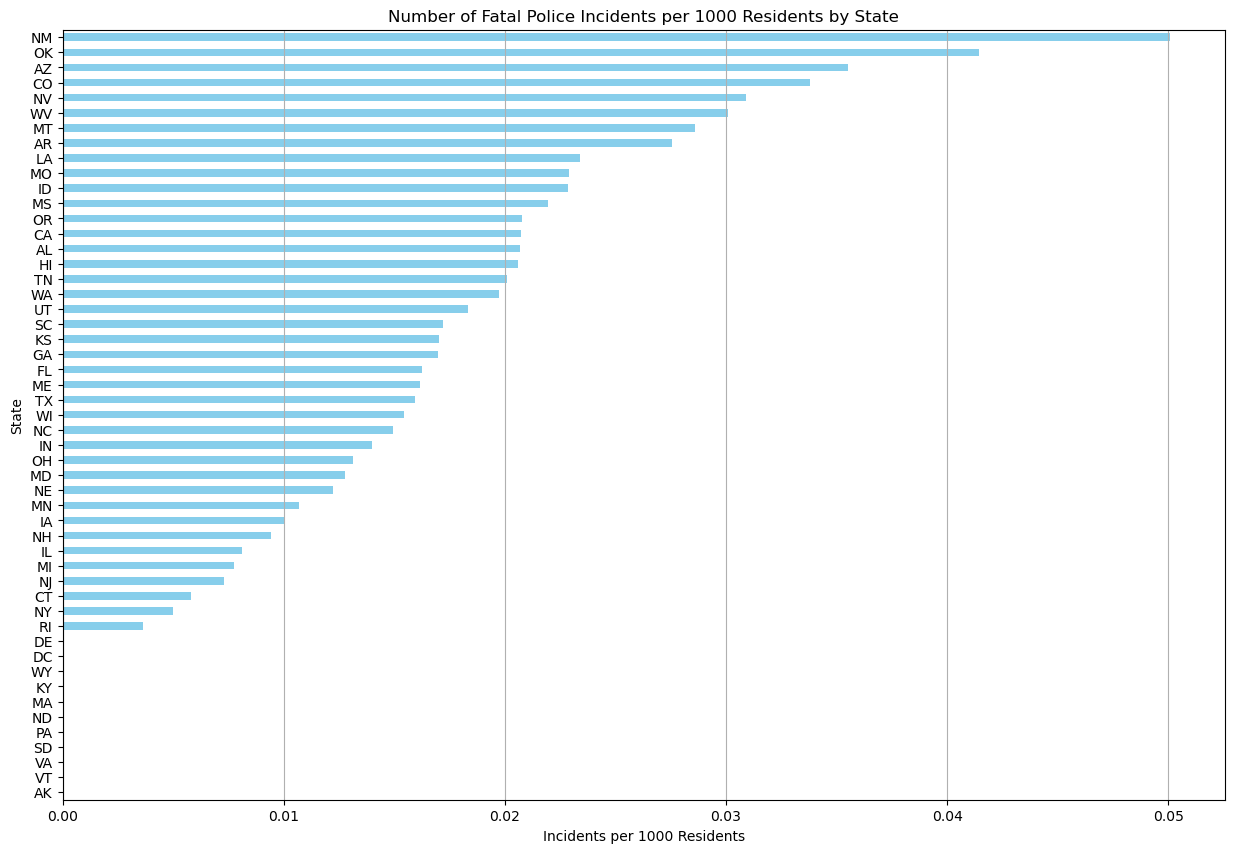

In [192]:
    # Visualization
    plt.figure(figsize=(15, 10))
    incidents_per_1000_by_state.sort_values().plot(kind='barh', color='skyblue')
    plt.title('Number of Fatal Police Incidents per 1000 Residents by State')
    plt.xlabel('Incidents per 1000 Residents')
    plt.ylabel('State')
    plt.grid(axis='x')
    plt.show()